# Introduction 

In the following notebook, I will be exploring a cleaned version of the weather_features.csv file.

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [35]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')
font_title = {'fontsize' : 24, 
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [36]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Weather_Features.csv', index_col='date_time')

# Data Overview

**Data Dictionary**

* **date_time**: date and time index localized to CET
* **city_name**: name of city
* **temp**: temperature in Fahrenheit
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of temp recording
* **month**: month of temp recording
* **year**: year of temp recording

**Data Preview**

In [37]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (178375, 7)


,city_name,temp,date,time,weekday,month,year
date_time,,,,,,,
2015-01-01 00:00:00,Valencia,27.1850,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,Valencia,27.1850,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,Valencia,25.7648,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,Valencia,25.7648,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,Valencia,25.7648,2015-01-01,04:00:00,Thursday,January,2015


**About the data**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178375 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   city_name  178375 non-null  object 
 1   temp       178375 non-null  float64
 2   date       178375 non-null  object 
 3   time       178375 non-null  object 
 4   weekday    178375 non-null  object 
 5   month      178375 non-null  object 
 6   year       178375 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 10.9+ MB


In [39]:
#Sum of missing values per column
df.describe()

,temp,year
count,178375.000000,178375.000000
mean,61.643440,2016.508670
std,14.447722,1.117775
min,12.362000,2015.000000
25%,50.936000,2016.000000
50%,60.800000,2017.000000
75%,71.600000,2018.000000
max,108.410000,2018.000000


**Data Distributions**

Text(0.5, 0, '')

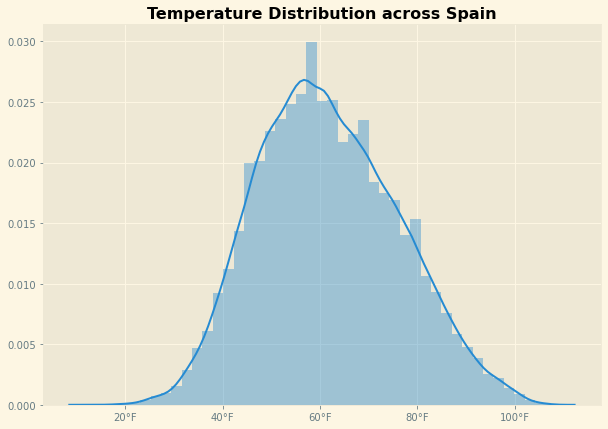

In [40]:
#Set figure size
f, ax = plt.subplots(figsize = (10,7))

#Plot data
j = sns.distplot(df.temp, bins = 45,ax = ax)

###Set plot aesthetics###
#Title
j.set_title('Temperature Distribution across Spain', fontsize = 16, fontweight = 'semibold')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
j.set_xlabel('')


# Exploratory Data Analysis

## Time plot of temperatures across all of spain

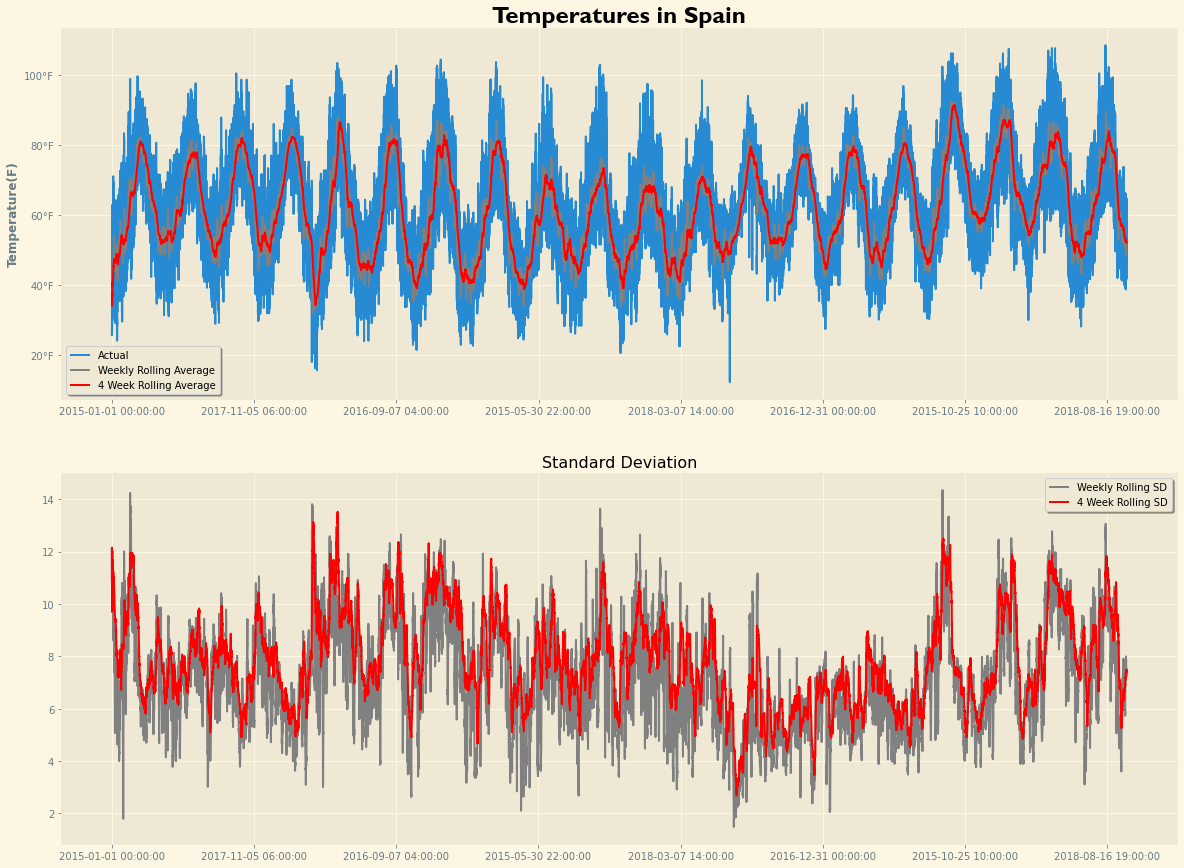

In [41]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

#Plot data
j = df.temp.plot(label = 'Actual', ax=ax[0]) #Raw Data
df.temp.rolling(window = 24*7, min_periods=14).mean().plot(color = 'grey', label = 'Weekly Rolling Average',ax=ax[0]) #Per day avg
df.temp.rolling(window = 24*7*4, min_periods=14).mean().plot(color = 'r', label = '4 Week Rolling Average',ax=ax[0]) #Per day avg

df.temp.rolling(window = 24*7, min_periods=14).std().plot(color = 'grey', label = 'Weekly Rolling SD',ax=ax[1]) #Per day standard deviation
df.temp.rolling(window = 24*7*4, min_periods=14).std().plot(color = 'r', label = '4 Week Rolling SD',ax=ax[1]) #Per day standard deviation


###Set plot aesthetics###
##plot 1##
#Title
ax[0].set_title('Temperatures in Spain', fontdict = font_title)

#Axes
ax[0].set_xlabel('')
ax[0].set_ylabel('Temperature(F)', fontweight='bold')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))


#Legend
ax[0].legend(fancybox = True, shadow = True, frameon = True)

##plot 2##
#Title
ax[1].set_title('Standard Deviation')

#Axes
ax[1].set_xlabel('')

#Legend
ax[1].legend(fancybox = True, shadow = True, frameon = True);

## Time series in specific cities

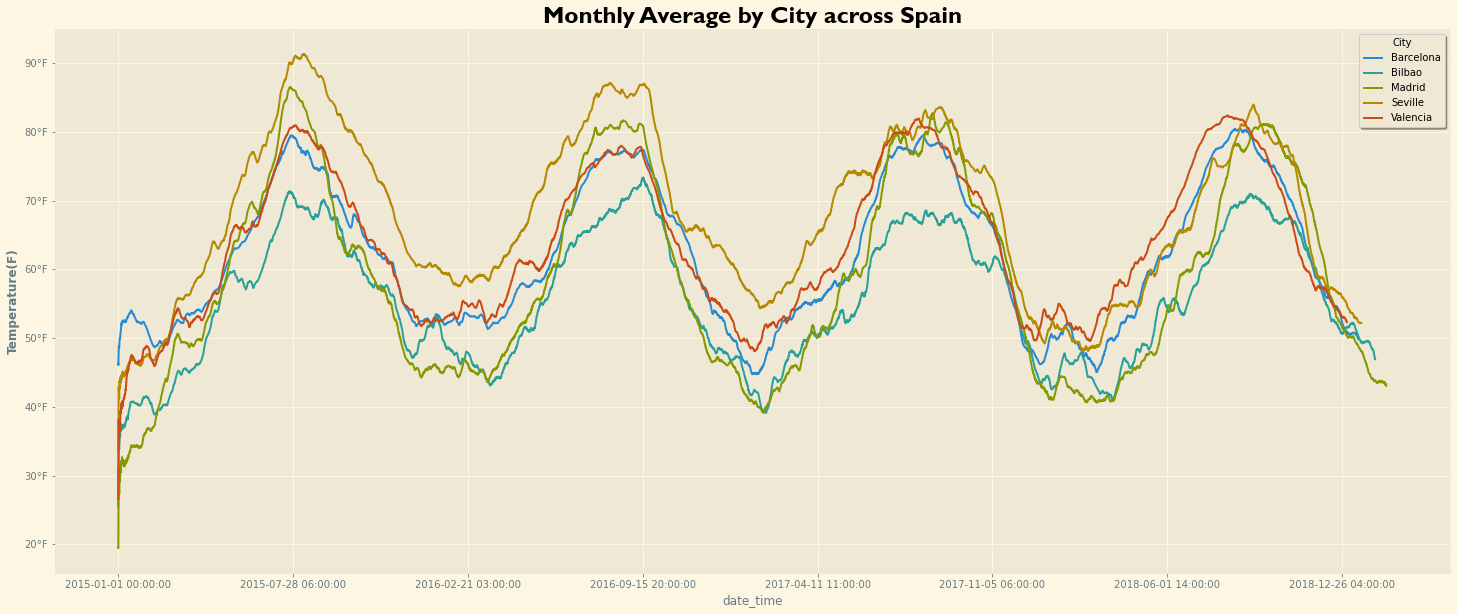

In [42]:
#Set figure
f, ax = plt.subplots(figsize = (25,10))

#Plot Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia'
df.loc[df.city_name == 'Barcelona'].temp.rolling(24*7*4,7).mean().plot(ax = ax, label = 'Barcelona')
df.loc[df.city_name == 'Bilbao'].temp.rolling(24*7*4,7).mean().plot(ax = ax, label = 'Bilbao')
df.loc[df.city_name == 'Madrid'].temp.rolling(24*7*4,7).mean().plot(ax = ax, label = 'Madrid')
df.loc[df.city_name == 'Seville'].temp.rolling(24*7*4,7).mean().plot(ax = ax, label = 'Seville')
df.loc[df.city_name == 'Valencia'].temp.rolling(24*7*4,7).mean().plot(ax = ax, label = 'Valencia')

###Set plot aesthetics###
#Title
ax.set_title('Monthly Average by City across Spain', fontdict = font_title)

#Axes
ax.set_ylabel('Temperature(F)', fontweight='bold')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

#Legend
ax.legend(title = 'City',fancybox = True, shadow = True, frameon = True);

**Autocorrelation plot**

Text(0.5, 1.0, 'Autocorrelation')

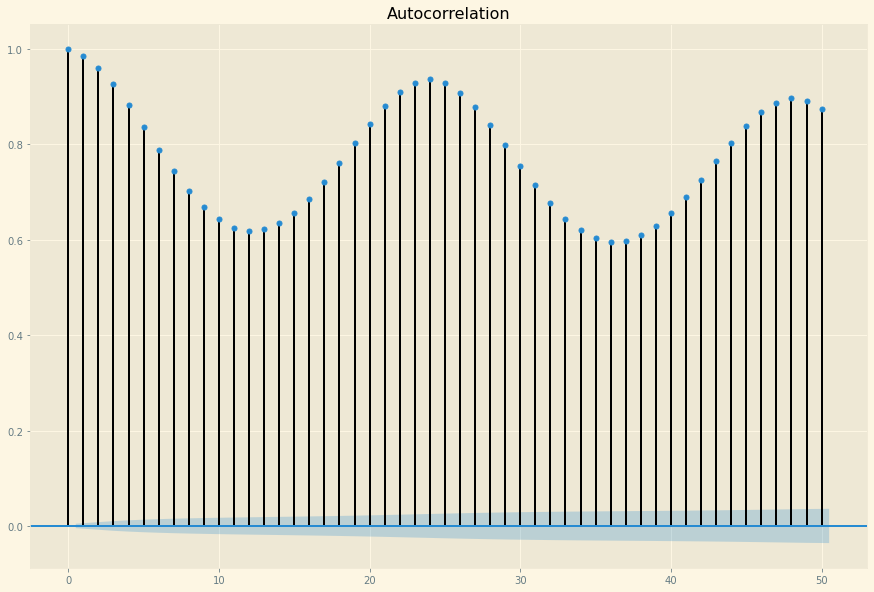

In [43]:
#Import ACF Plot
from statsmodels.graphics.tsaplots import plot_acf

#Set figure
f, ax = plt.subplots(figsize = (15,10))

#Plot autocorrelation
plot_acf(df.temp, lags = 50, ax = ax);

ax.set_title('Autocorrelation')

**Zoooming in on the first week to see 24hr seasonality**

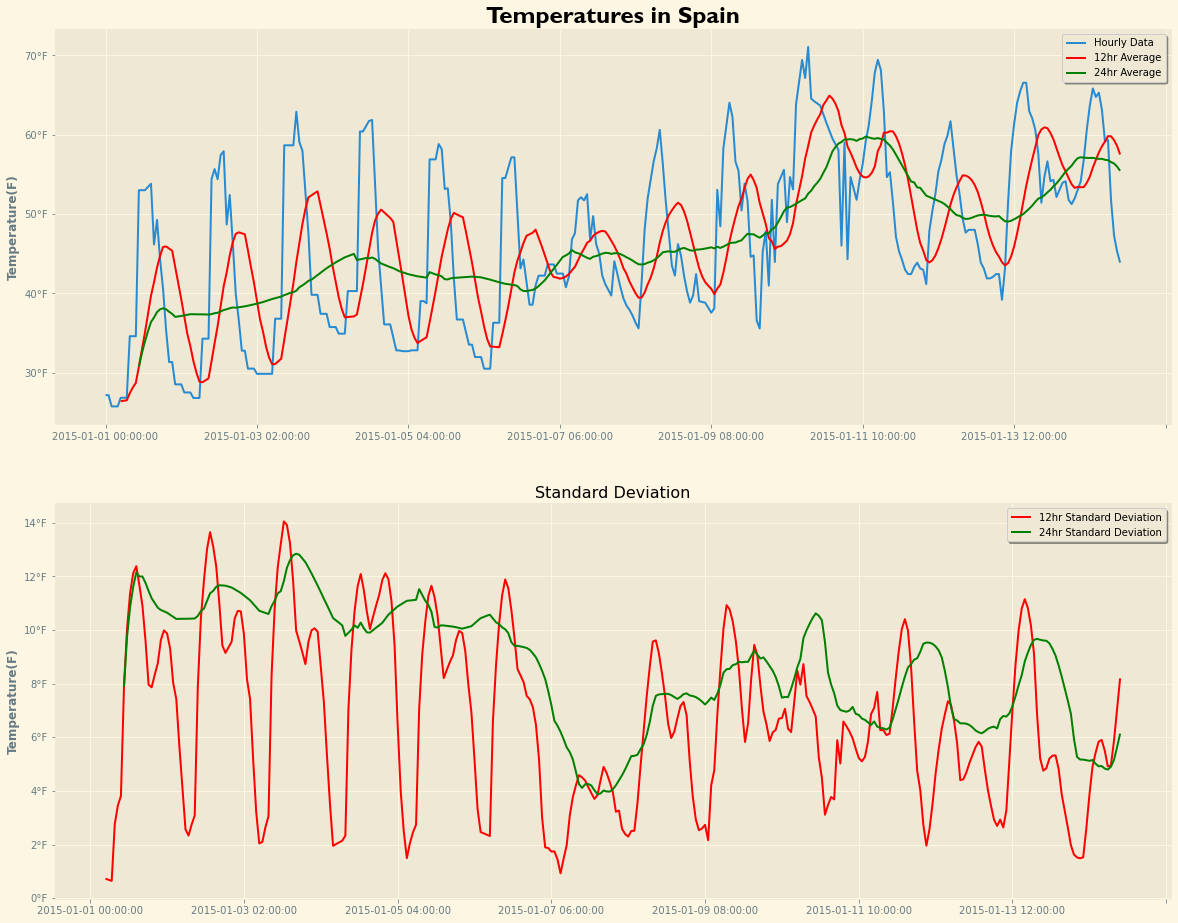

In [60]:
#Set figure
f, ax = plt.subplots(2,1,figsize = (20,16))

#Plot data
df.temp.iloc[0:24*7*2].plot(ax = ax[0], label = 'Hourly Data')
df.temp.iloc[0:24*7*2].rolling(12,6).mean().plot(color = 'r',ax = ax[0], label = '12hr Average')
df.temp.iloc[0:24*7*2].rolling(24,12).mean().plot(color = 'g',ax = ax[0], label = '24hr Average')

df.temp.iloc[0:24*7*2].rolling(12,6).std().plot(color = 'r',ax = ax[1], label = '12hr Standard Deviation')
df.temp.iloc[0:24*7*2].rolling(24,12).std().plot(color = 'g',ax = ax[1], label = '24hr Standard Deviation')

###Set plot aesthetics###
##plot 1##
#Title
ax[0].set_title('Temperatures in Spain', fontdict = font_title)

#Axes
ax[0].set_xlabel('')
ax[0].set_ylabel('Temperature(F)', fontweight='bold')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))


#Legend
ax[0].legend(fancybox = True, shadow = True, frameon = True)

##plot 2##
#Title
ax[1].set_title('Standard Deviation')

#Axes
ax[1].set_xlabel('')
ax[1].set_ylabel('Temperature(F)', fontweight='bold')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

#Legend
ax[1].legend(fancybox = True, shadow = True, frameon = True);

**Yearly Temperature Trends**

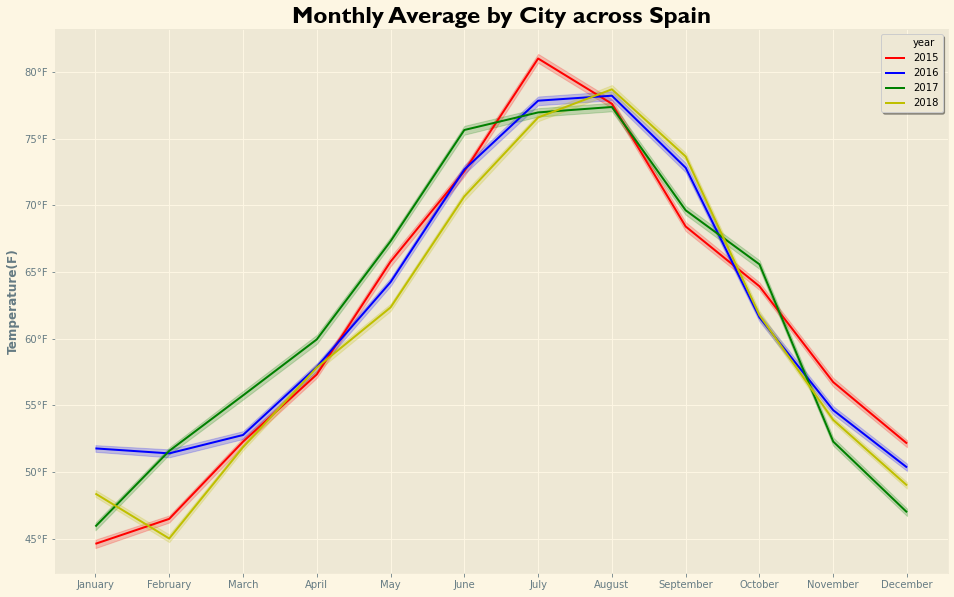

In [52]:
#Set figure
f, ax = plt.subplots(figsize = (16,10))

#Set colors for lineplot
colors = ['r','b','g','y']

#Plot Data
sns.lineplot(x = 'month', y ='temp', hue = 'year', data = df,sort = False,legend='full',
             palette=colors, ax = ax)

###Set plot aesthetics###
#Title
ax.set_title('Monthly Average by City across Spain', fontdict = font_title)

#Axes
ax.set_xlabel('')
ax.set_ylabel('Temperature(F)', fontweight='bold')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

#Legend
ax.legend(fancybox = True, shadow = True, frameon = True);